Using TensorFlow backend.


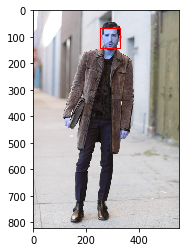

In [1]:
import cv2
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox
import numpy as np
from sklearn.cluster import KMeans
from collections import Counter
%matplotlib inline

# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# Read the input image
img = cv2.imread('C:\\Users\\mb910\\mulcam_project\\dataset\\clothing-co-parsing\\photos\\0348.jpg')
# Detect faces
faces = face_cascade.detectMultiScale(img, scaleFactor=1.1) # scaleFactor: 이미지에서 얼굴 크기가 서로 다른 것을 보상해주는 값
# # Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
# Display the output
# image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


In [2]:
faces

array([[254,  68,  75,  75]], dtype=int32)

In [3]:
import cv2
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox

import numpy as np
from sklearn.cluster import KMeans
from collections import Counter
import json

=== outputs ===
bounding boxes    : [[122, 40, 372, 816]]
detected objects  : ['person']
confidence levels : [0.9976884126663208]



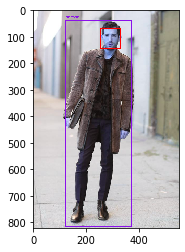

In [4]:
bbox, label, conf = cv.detect_common_objects(img)
print('=== outputs ===')
print(f'bounding boxes    : {bbox}')  # x, y, x+width, y+height
print(f'detected objects  : {label}')
print(f'confidence levels : {conf}\n')

if label.count('person') > 1:   # Exceptional case : 2 or more persons are detected
    print('>>> Warning : More than 1 person is detected from the given picture!')
    idx = label.index('person')
    bbox = [bbox[idx]]
    label = [label[idx]]
    conf = [conf[idx]]
    
    output_image = draw_bbox(img, bbox, label, conf)
    plt.imshow(output_image)
    plt.show()
elif 'person' in label:   # Ideal case : only one main preson is detected
    idx = label.index('person')
    bbox = [bbox[idx]]
    label = [label[idx]]
    conf = [conf[idx]]
    
    output_image = draw_bbox(img, bbox, label, conf)
    plt.imshow(output_image)
    plt.show()
else:   # Exceptional case : No person is detected
    print('>>> Warning : No person is detected from the given picture!')
    output_image = draw_bbox(img, bbox, label, conf)
    plt.imshow(output_image)
    plt.show()

>>> type of img     : <class 'numpy.ndarray'>
>>> size of matrix : (821, 550, 3)


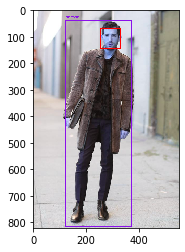

In [5]:
# file_path = 'C:\\Users\\mb910\\mulcam_project\\dataset\\clothing-co-parsing\\photos\\0001.jpg'
# img = cv2.imread(file_path)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(f'>>> type of img     : {type(img)}')
print(f'>>> size of matrix : {img.shape}')
plt.imshow(img)
plt.show()

In [6]:
img = img[(faces[0][1]+faces[0][3]):bbox[0][3], bbox[0][0]:bbox[0][2]]

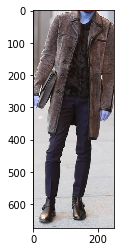

In [7]:
# crop the detected area of image
# img = img[bbox[0][1]:bbox[0][3], bbox[0][0]:bbox[0][2]]
plt.imshow(img)

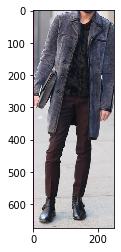

In [8]:
# # crop the detected area of image
# img = img[bbox[0][1]:bbox[0][3], bbox[0][0]:bbox[0][2]]

# Load the cascade
# face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Read the input image
# img = cv2.imread('C:\\Users\\mb910\\mulcam_project\\dataset\\clothing-co-parsing\\photos\\0001.jpg')

# Detect faces
# faces = face_cascade.detectMultiScale(img) # scaleFactor: 이미지에서 얼굴 크기가 서로 다른 것을 보상해주는 값
# iimg = img[(faces[0][1]+faces[0][3]):].copy()
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image)
#represent as row*column,channel number (appropriate format for KMeans)
img_reshape = image.reshape((image.shape[0] * image.shape[1], 3))

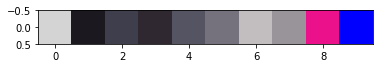

In [10]:
# arrange the cluster_centers of KMeans output according to frequency of each label
def arrange_cluster_centers(clt):
    lb_counts = Counter(clt.labels_)
    
    tmp_dict = {}
    for idx, pixel in enumerate(clt.cluster_centers_):
        tmp_dict[ lb_counts[idx] ] = pixel  # { frequency of label : color of label } mapping
    
    centers_aranged_dict = dict(sorted(tmp_dict.items(), reverse=True))  # arrange the dict according to key (frequency of label)

    centers_aranged_arr = np.array(list(centers_aranged_dict.values()))  # pack colors into one array
    centers_aranged_arr = centers_aranged_arr.round().astype("uint8")  # tranform the type to integer
    centers_aranged_arr = np.expand_dims(centers_aranged_arr, 0)  # add one dimension for visualization
    return centers_aranged_arr


expected_num_col = 10 #cluster number

# Extract dominant color using KMeans
clt = KMeans(n_clusters = expected_num_col)
clt.fit(img_reshape)

# Visualization
centers_aranged_arr = arrange_cluster_centers(clt)

plt.imshow(centers_aranged_arr)
plt.show()